In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets import *
from matplotlib import colors
color_arr = colors.ListedColormap(["#FFA225", "#3BA2FF"])  #, "#DCDCDC"])
sklearn.datasets.__all__

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_rcv1',
 'fetch_kddcup99',
 'fetch_openml',
 'get_data_home',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_breast_cancer',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_circles',
 'make_classification',
 'make_checkerboard',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

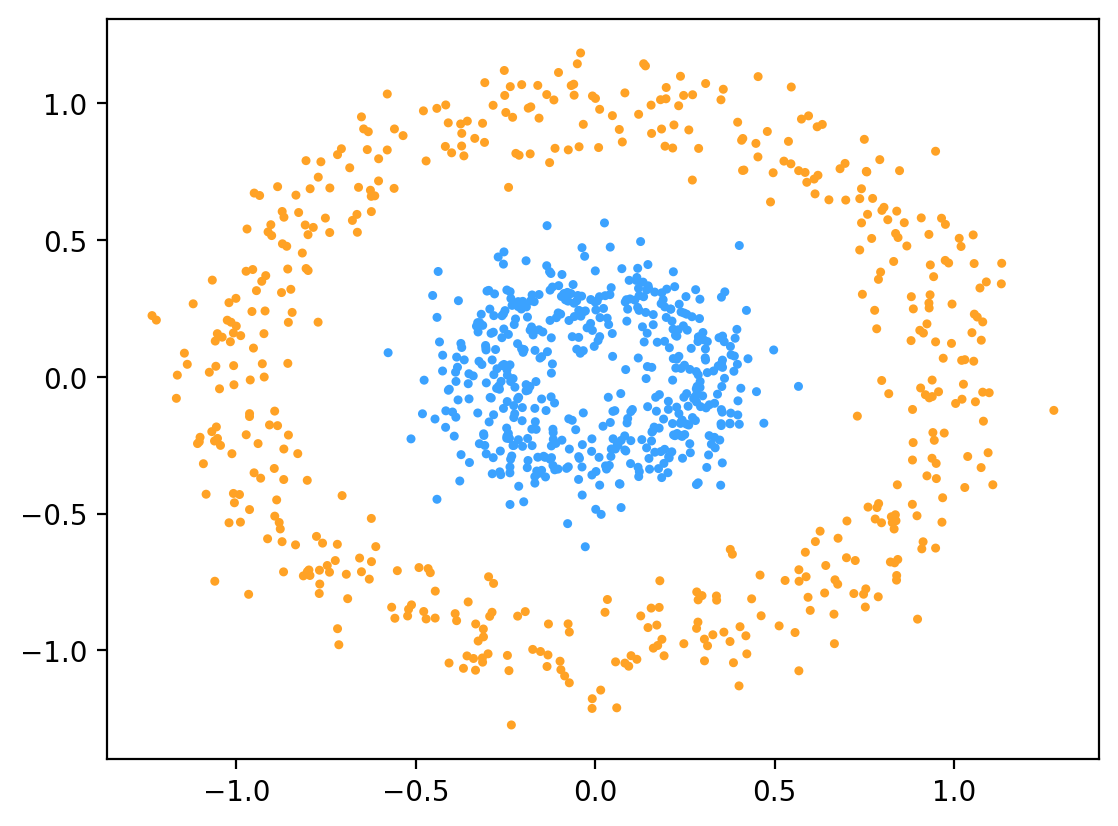

In [24]:
circle_data, circle_target = make_circles(n_samples=1000, noise=0.1, factor=0.3)

plt.rcdefaults()
plt.rcParams['figure.dpi'] = 200
plt.scatter(circle_data[:, 0], circle_data[:, 1], s=5, c=circle_target, cmap=color_arr)
plt.draw()

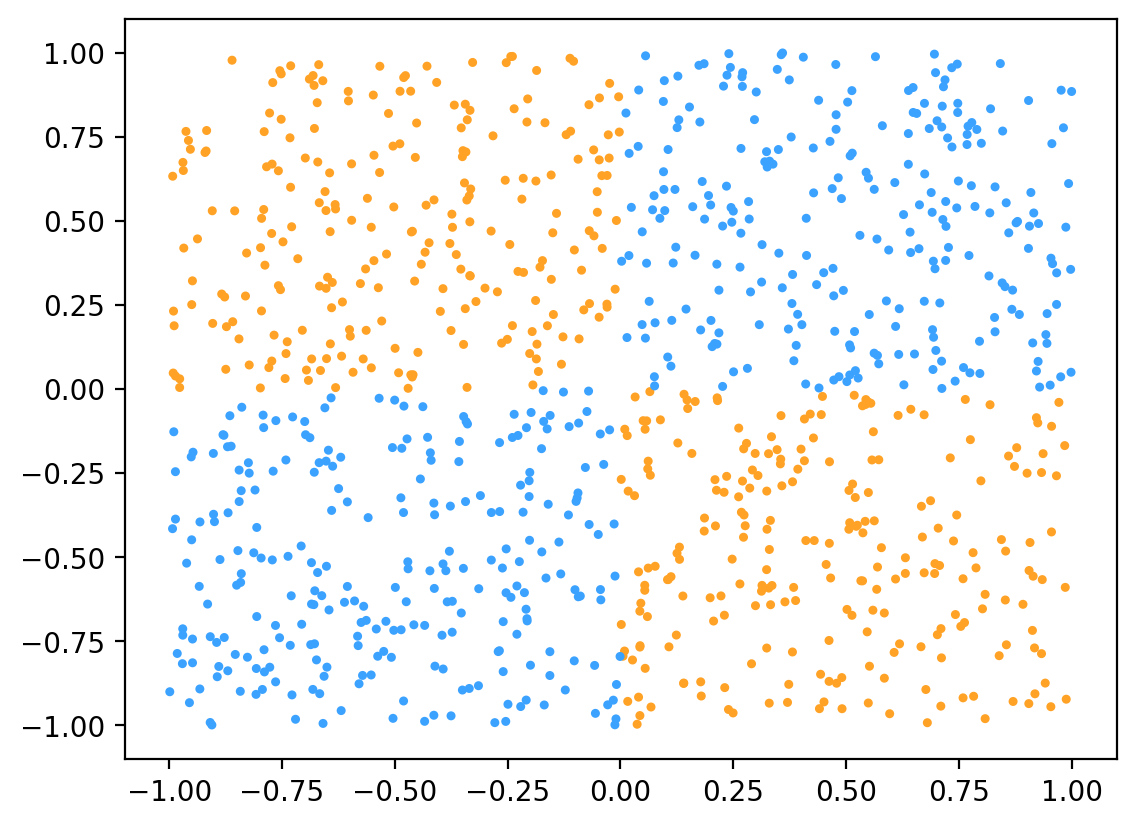

In [43]:
sf_data = 2 * np.random.rand(1000, 2) - 1
sf_target = (sf_data[:, 0] * sf_data[:, 1] > 0) * 1
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 200
plt.scatter(sf_data[:, 0], sf_data[:, 1], s=5, c=sf_target, cmap=color_arr)
plt.draw()

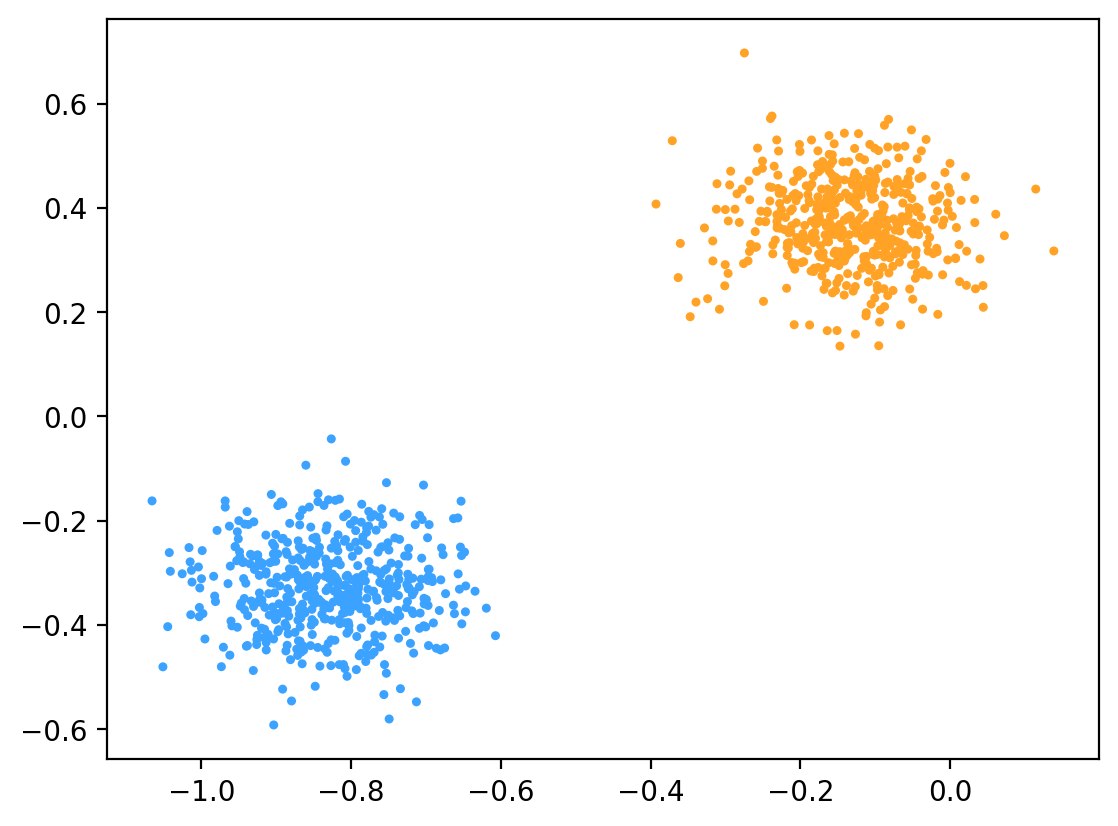

In [155]:
# 对角
dj_data, dj_target = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1)
dj_data = dj_data/12
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 200
plt.scatter(dj_data[:, 0], dj_data[:, 1], s=5, c=dj_target, cmap=color_arr)
plt.draw()

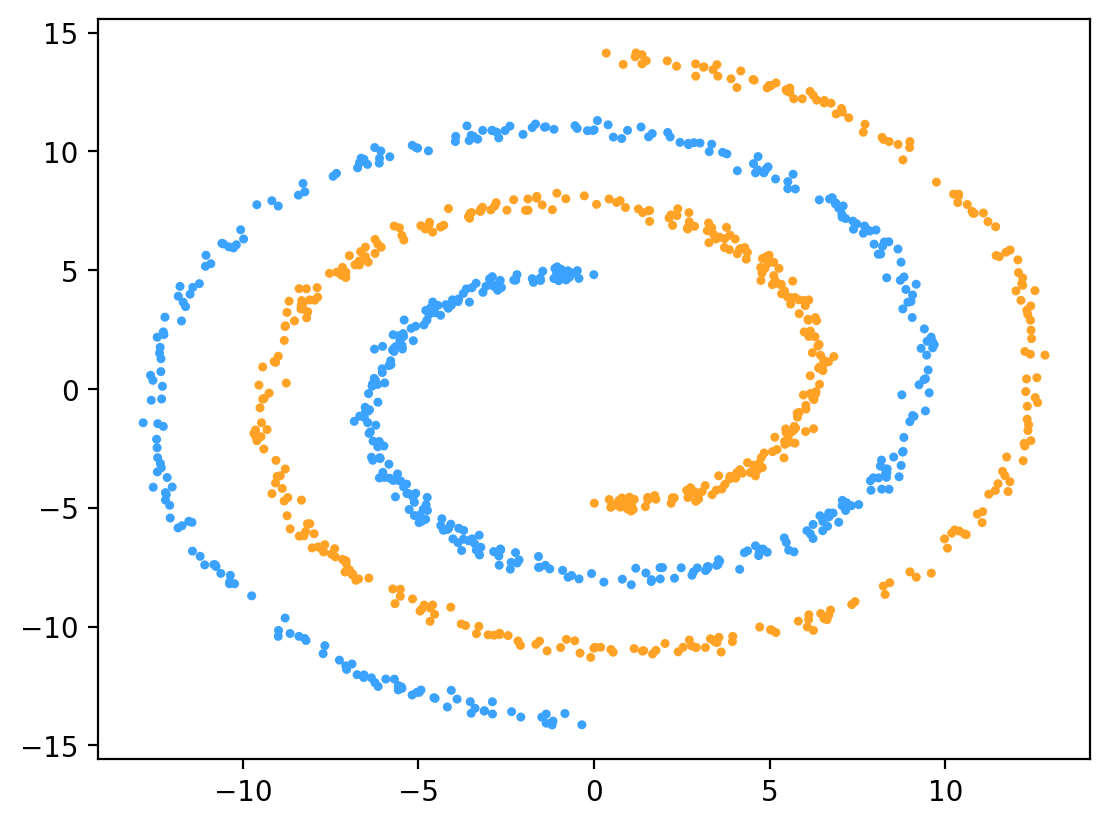

In [94]:
# 螺旋
lx_data, lx_target = make_swiss_roll(n_samples=500, random_state=0, noise=0.2)
lx_data[:, 1] = lx_data[:, 2]
lx_data[:, 2] = 1
lx_data_2 = lx_data.copy()
lx_data_2[:, 0] = -lx_data[:, 0]
lx_data_2[:, 1] = -lx_data[:, 1]
lx_data[:, 2] = 0
lx_data = np.row_stack([lx_data, lx_data_2])
lx_target = lx_data[:, 2]
lx_data = lx_data[:, :2]
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 200
plt.scatter(lx_data[:, 0], lx_data[:, 1], s=5, c=lx_target, cmap=color_arr)
plt.draw()

In [96]:
import torch
from torch import nn
from torch.nn import Module
import torch.nn.functional as F

class MLP_6642(Module):
    def __init__(self):
        super(MLP_6642, self).__init__()
        self.l1 = nn.Linear(7, 6)
        self.l2 = nn.Linear(6, 6)
        self.l3 = nn.Linear(6, 4)
        self.l4 = nn.Linear(4, 2)
    def forward(self, input):
        x = F.relu(self.l1(input))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return F.softmax(x, dim=1)

model = MLP_6642()
model

MLP_6642(
  (l1): Linear(in_features=7, out_features=6, bias=True)
  (l2): Linear(in_features=6, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=4, bias=True)
  (l4): Linear(in_features=4, out_features=2, bias=True)
)

In [113]:
import math
from torch import tensor
yq_data, yq_target = make_circles(n_samples=1000, noise=0.1, factor=0.3)

def fill_7(data):
    data_x_pd = pd.DataFrame(data, columns=['x1', 'x2'])
    data_x_pd['x1^2'] = data_x_pd['x1'] * data_x_pd['x1']
    data_x_pd['x2^2'] = data_x_pd['x2'] * data_x_pd['x2']
    data_x_pd['x1x2'] = data_x_pd['x1'] * data_x_pd['x2']
    data_x_pd['sin(x1)'] = data_x_pd['x1'].apply(lambda a: math.sin(a))
    data_x_pd['sin(x2)'] = data_x_pd['x2'].apply(lambda a: math.sin(a))
    return tensor(data_x_pd.values, dtype=torch.float)

seven_data = fill_7(yq_data)
seven_data

tensor([[ 1.0614,  0.0390,  1.1267,  ...,  0.0414,  0.8731,  0.0390],
        [ 1.0469,  0.2923,  1.0961,  ...,  0.3060,  0.8659,  0.2881],
        [ 0.2860, -0.0058,  0.0818,  ..., -0.0016,  0.2821, -0.0058],
        ...,
        [-0.1947, -0.3880,  0.0379,  ...,  0.0756, -0.1935, -0.3784],
        [-0.9256,  0.0630,  0.8568,  ..., -0.0583, -0.7990,  0.0629],
        [ 0.4105, -0.7992,  0.1685,  ..., -0.3281,  0.3991, -0.7168]])

In [103]:
target_1 = model(seven_data).cpu().detach().numpy()
target_1

array([[0.5940987 , 0.40590128],
       [0.6048751 , 0.3951249 ],
       [0.5886286 , 0.41137138],
       ...,
       [0.5865064 , 0.4134935 ],
       [0.59586585, 0.40413412],
       [0.612204  , 0.38779598]], dtype=float32)

In [105]:
target_2 = (target_1[:, 0] > target_1[:, 1]) * 1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

10201


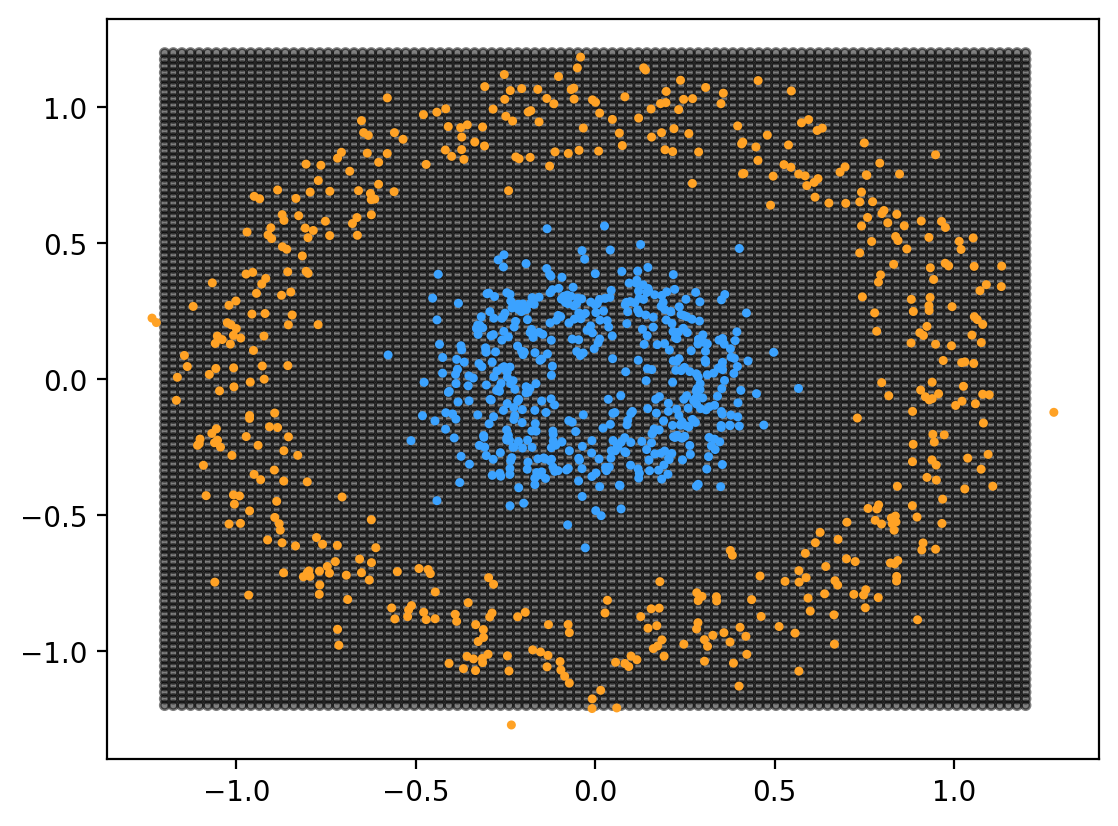

In [128]:
target_1 = model(seven_data).cpu().detach().numpy()
target_1 = (target_1[:, 0] > target_1[:, 1]) * 1

disp_scale = 100.0
disp_input = []
for a in range(int(disp_scale) + 1):
    for b in range(int(disp_scale) + 1):
        disp_input.append([a / disp_scale, b / disp_scale])
print(len(disp_input))
disp_np = np.array(disp_input)
disp_np = disp_np * 2.4 - 1.2
disp_tensor = tensor(disp_np, dtype=torch.float)

target_disp = model(fill_7(disp_np)).cpu().detach().numpy()
target_disp = (target_disp[:, 0] > target_disp[:, 1]) * 1

plt.rcdefaults()
plt.rcParams['figure.dpi'] = 200
plt.scatter(disp_np[:, 0], disp_np[:, 1], s=10, c=target_disp, cmap='gray', alpha=0.5)
plt.scatter(circle_data[:, 0], circle_data[:, 1], s=5, c=circle_target, cmap=color_arr)
plt.draw()

tensor([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

0 loss 0.69784075


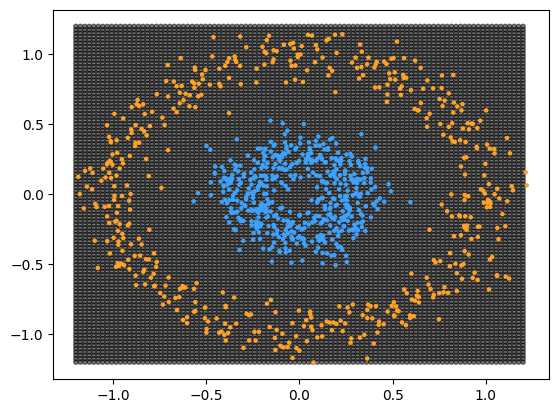

100 loss 0.31326193


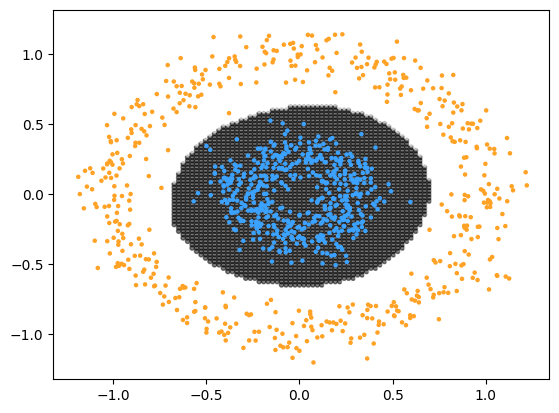

200 loss 0.31326193


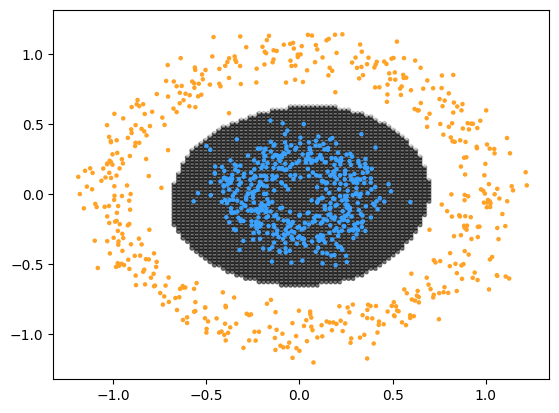

300 loss 0.31326193


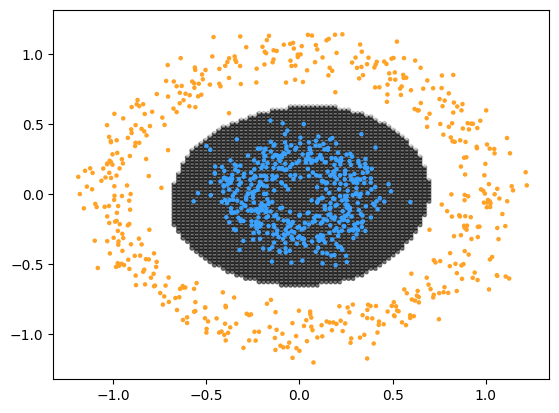

400 loss 0.31326193


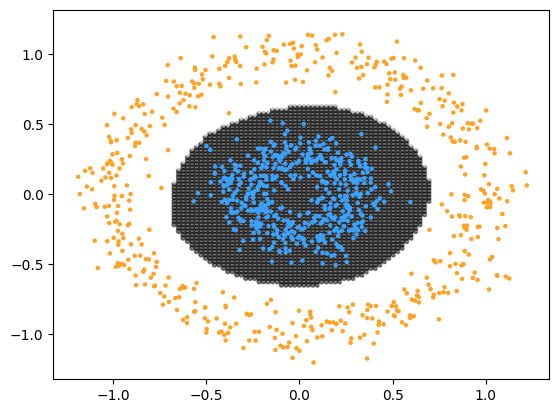

500 loss 0.31326193


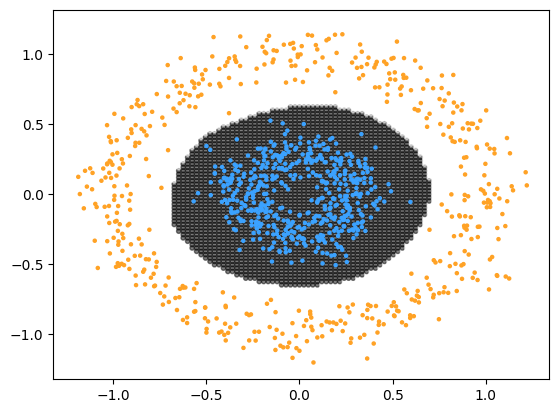

600 loss 0.31326193


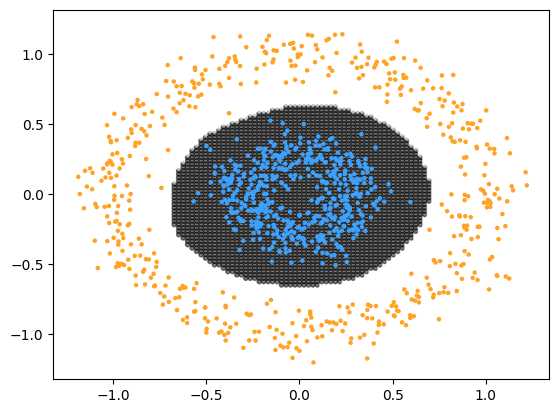

700 loss 0.31326193


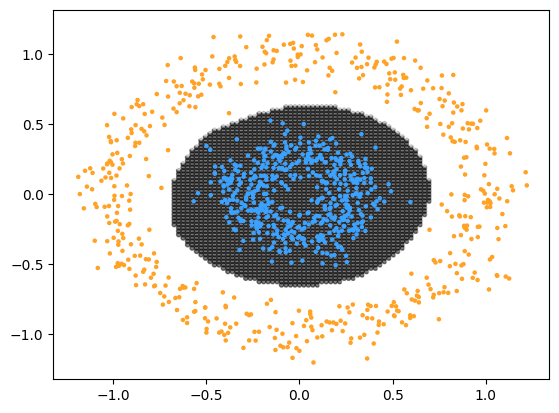

800 loss 0.31326193


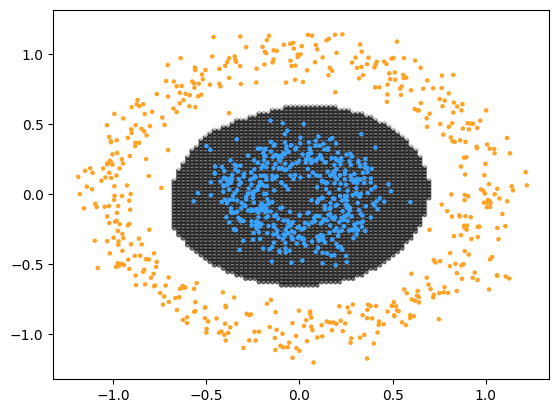

900 loss 0.31326193


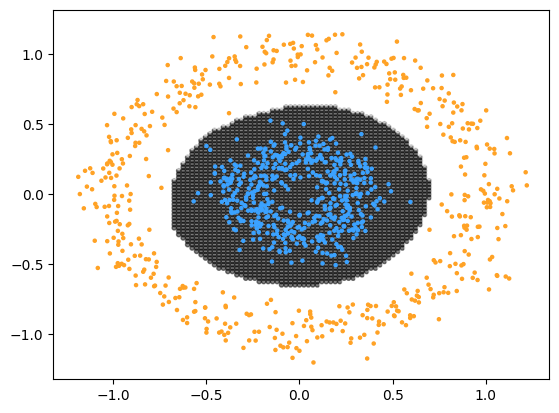

In [145]:
from torch import optim
import time
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 100

train_x = seven_data.cuda()
yq_target_tensor = tensor(yq_target, dtype=torch.long)
train_y = yq_target_tensor.cuda()

model = MLP_6642().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
for iter in range(1000):
    predict = model(train_x)
    loss = criterion(predict, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter % 100 == 0:
        print(iter, "loss", loss.cpu().detach().numpy())
        model.eval()
        disp_tensor = fill_7(disp_np).cuda()
        target_disp = model(disp_tensor).cpu().detach().numpy()
        model.train()
        target_disp = (target_disp[:, 0] > target_disp[:, 1]) * 1
        plt.scatter(disp_np[:, 0], disp_np[:, 1], s=10, c=target_disp, cmap='gray', alpha=0.5)
        plt.scatter(yq_data[:, 0], yq_data[:, 1], s=5, c=yq_target, cmap=color_arr)
        plt.show()


0 loss 0.69295824


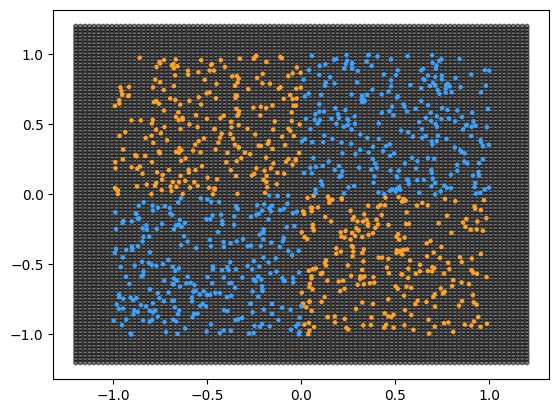

10 loss 0.69251513


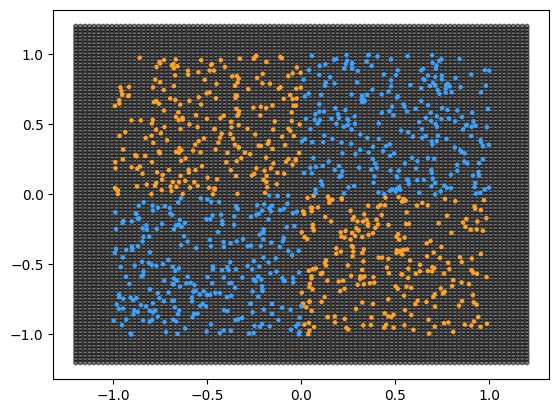

20 loss 0.692501


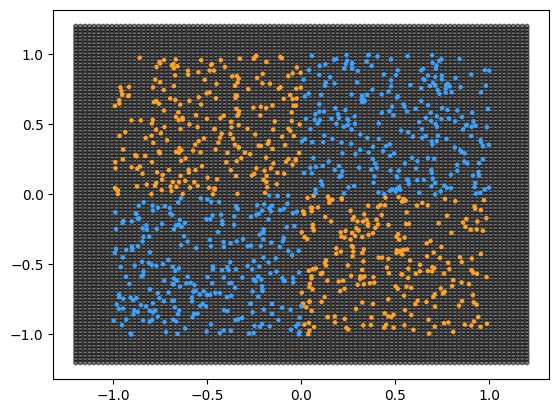

30 loss 0.69249904


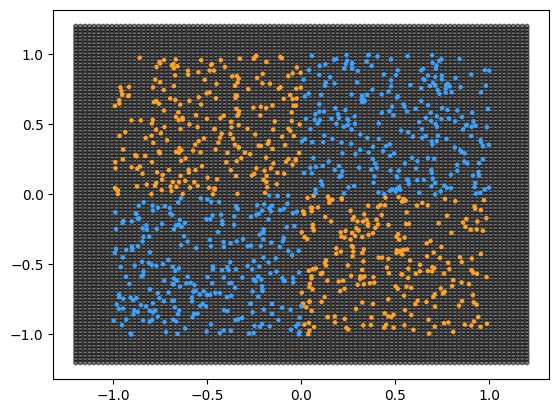

40 loss 0.69250184


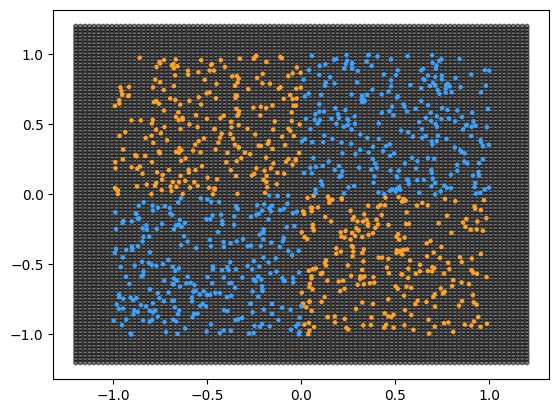

50 loss 0.6925004


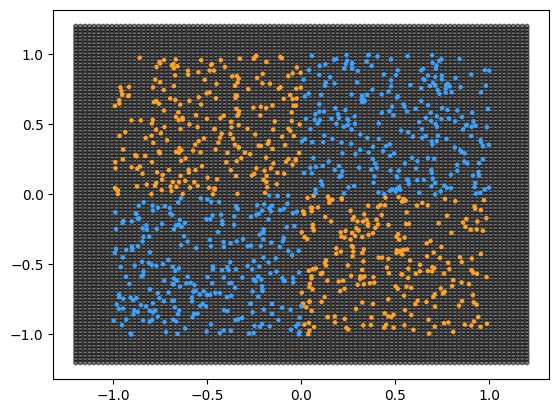

60 loss 0.69249916


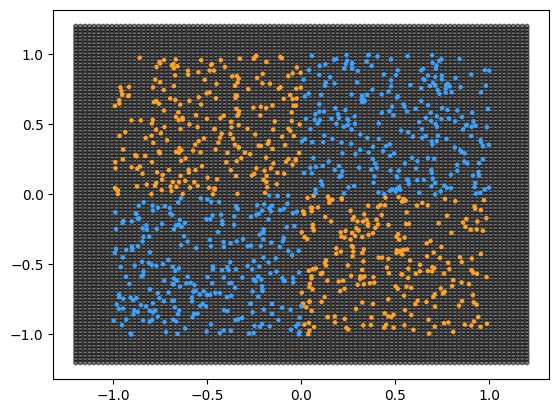

70 loss 0.69249946


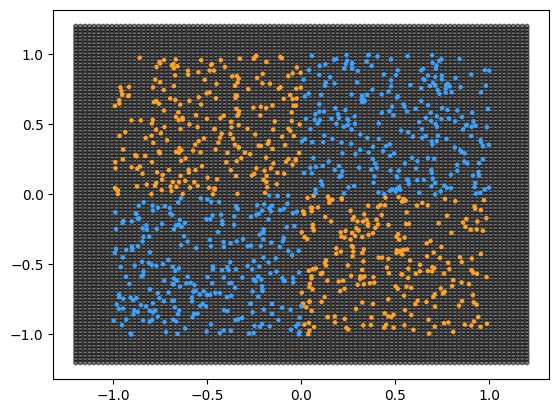

80 loss 0.6924989


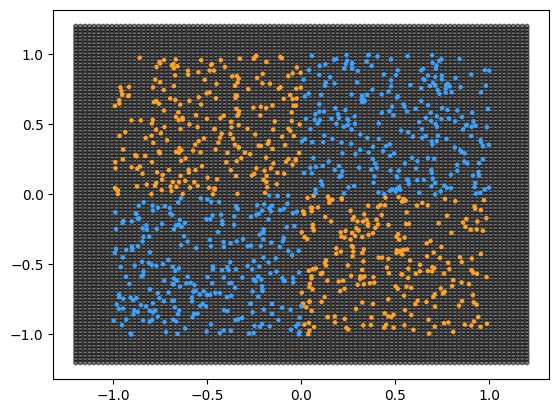

90 loss 0.6924992


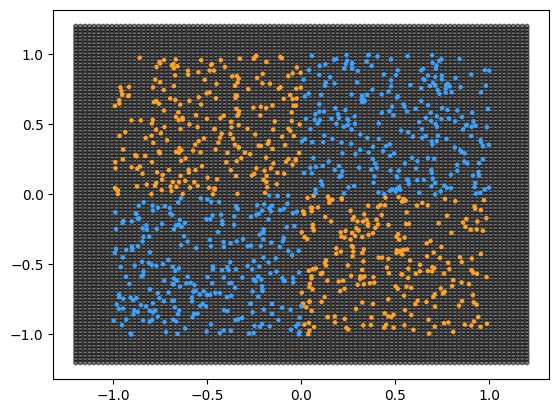

In [152]:
from torch import optim
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 100

sf_seven_data = fill_7(sf_data)
train_x = seven_data.cuda()
sf_target_tensor = tensor(sf_target, dtype=torch.long)
train_y = sf_target_tensor.cuda()

model = MLP_6642().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.2)
for iter in range(100):
    predict = model(train_x)
    loss = criterion(predict, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter % 10 == 0:
        print(iter, "loss", loss.cpu().detach().numpy())
        model.eval()
        disp_tensor = fill_7(disp_np).cuda()
        target_disp = model(disp_tensor).cpu().detach().numpy()
        model.train()
        target_disp = (target_disp[:, 0] > target_disp[:, 1]) * 1
        plt.scatter(disp_np[:, 0], disp_np[:, 1], s=10, c=target_disp, cmap='gray', alpha=0.5)
        plt.scatter(sf_data[:, 0], sf_data[:, 1], s=5, c=sf_target, cmap=color_arr)
        plt.show()


0 loss 0.6931474


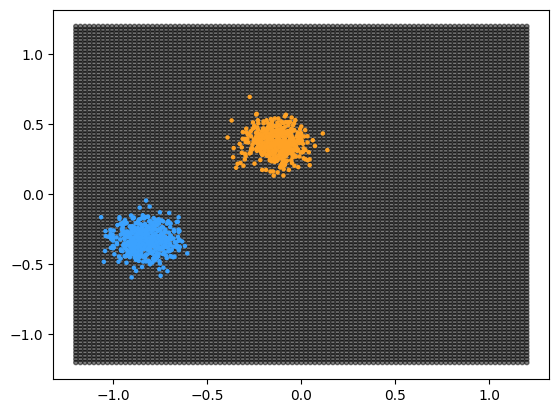

10 loss 0.6931474


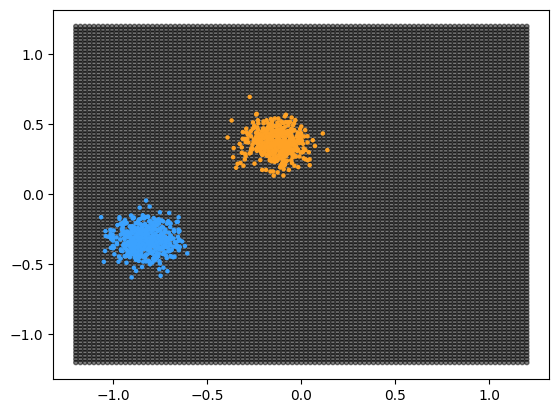

20 loss 0.6931474


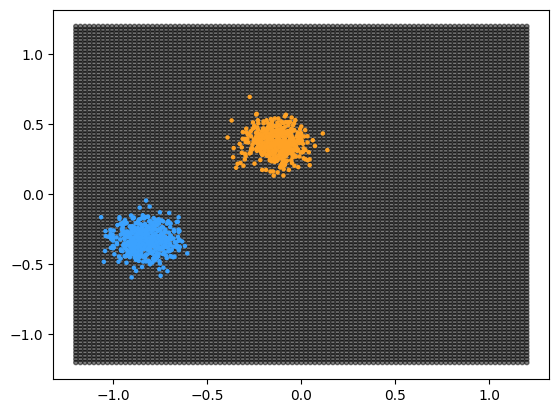

30 loss 0.6931474


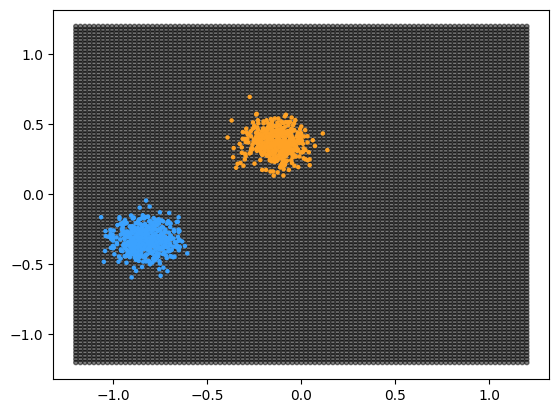

40 loss 0.6931474


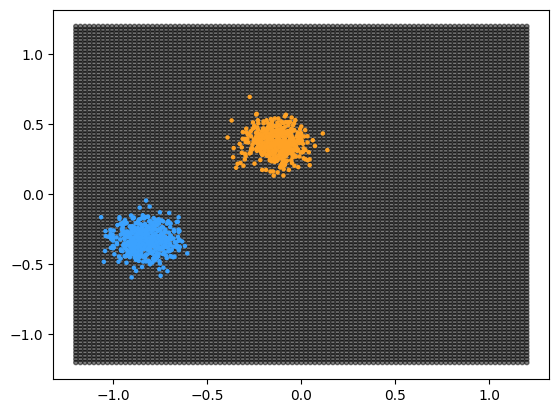

50 loss 0.6931474


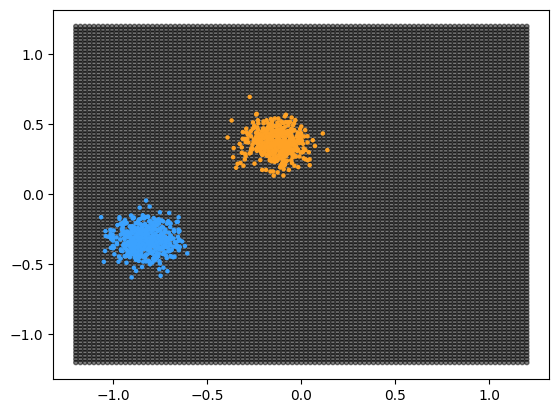

60 loss 0.6931474


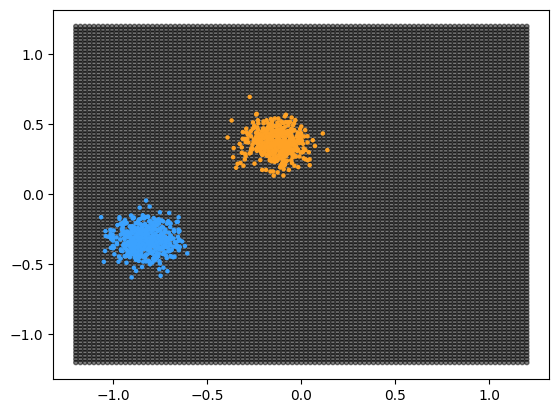

70 loss 0.6931474


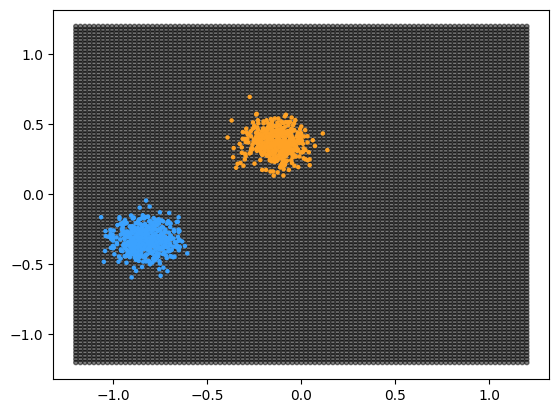

80 loss 0.6931474


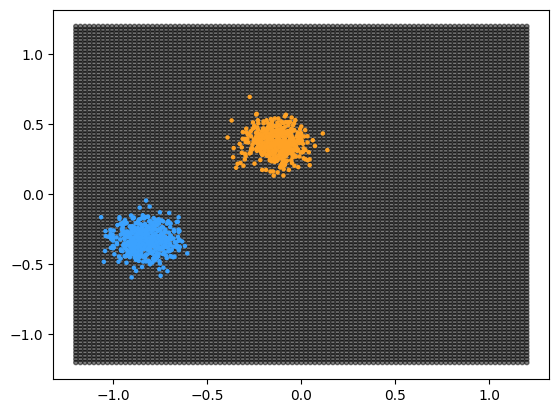

90 loss 0.6931474


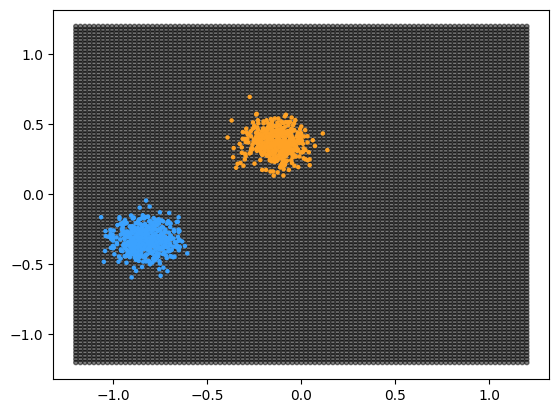

In [156]:
from torch import optim
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 100

dj_seven_data = fill_7(dj_data)
train_x = seven_data.cuda()
dj_target_tensor = tensor(dj_target, dtype=torch.long)
train_y = dj_target_tensor.cuda()

model = MLP_6642().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.2)
for iter in range(100):
    predict = model(train_x)
    loss = criterion(predict, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iter % 10 == 0:
        print(iter, "loss", loss.cpu().detach().numpy())
        model.eval()
        disp_tensor = fill_7(disp_np).cuda()
        target_disp = model(disp_tensor).cpu().detach().numpy()
        model.train()
        target_disp = (target_disp[:, 0] > target_disp[:, 1]) * 1
        plt.scatter(disp_np[:, 0], disp_np[:, 1], s=10, c=target_disp, cmap='gray', alpha=0.5)
        plt.scatter(dj_data[:, 0], dj_data[:, 1], s=5, c=dj_target, cmap=color_arr)
        plt.show()
